In [1]:
from plots_utils import *

Sto caricando: ./out_healthy/UMAP_H3BERTA_HEALTHY_REPERTOIRE_WITHCDRH3DUPLICATES_703010242 PCA embeddings.csv


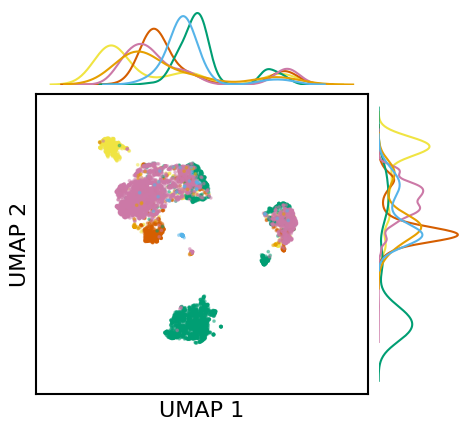

<Figure size 300x100 with 0 Axes>

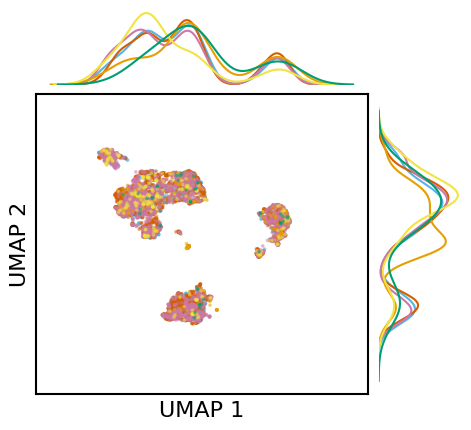

<Figure size 300x100 with 0 Axes>

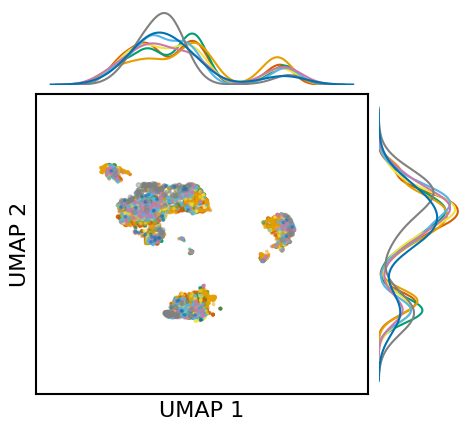

<Figure size 300x100 with 0 Axes>

In [2]:
# random selection
import glob
import random
import pandas as pd

# 1. Crea la lista di tutti i CSV che terminano con "PCA embeddings.csv"
file_list = glob.glob("./out_healthy/*PCA embeddings.csv")

# 2. Sceglie casualmente un file dalla lista
file_path = random.choice(file_list)
print(f"Sto caricando: {file_path}")

# 3. Legge il CSV scelto
df = pd.read_csv(file_path)

# 4. Normalizza le colonne come facevi già
for col in ['v_family', 'j_family', 'd_family']:
    df[col] = (
        df[col].astype(str)
               .str.split('/', n=1).str[0]
               .str.split('-', n=1).str[0]
    )

# 5. Plotta
plot_umap_single_gene_INSCAPE(df, gene_col='j_family', title='J Gene', file_suffix="./img/TEST")
plot_umap_single_gene_INSCAPE(df, gene_col='v_family', title='V Gene', file_suffix="./img/TEST")
plot_umap_single_gene_INSCAPE(df, gene_col='d_family', title='D Gene', file_suffix="./img/TEST")


Sto caricando: ./out_healthy/PCA_H3BERTA_HEALTHY_REPERTOIRE_WITHCDRH3DUPLICATES_706010188 PCA embeddings.csv


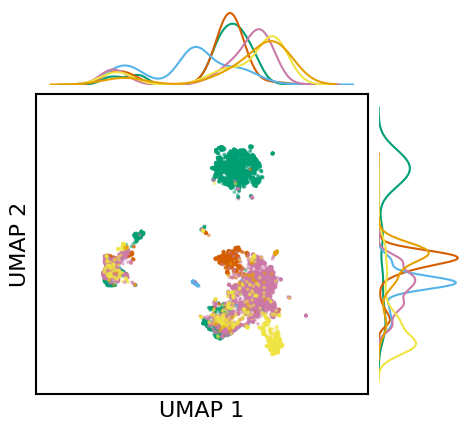

<Figure size 300x100 with 0 Axes>

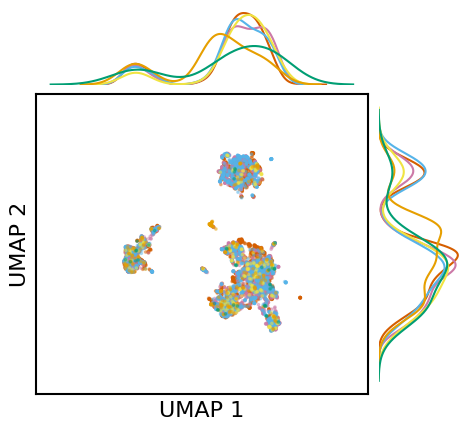

<Figure size 300x100 with 0 Axes>

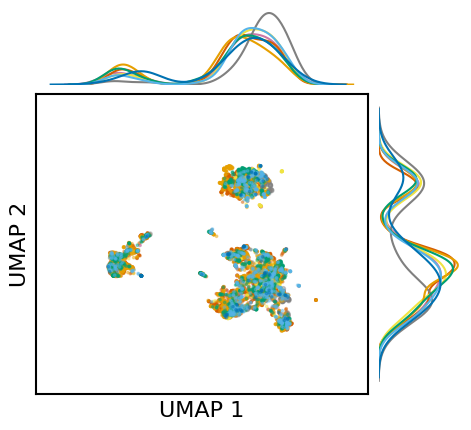

<Figure size 300x100 with 0 Axes>

In [3]:
# random selection
import glob
import random
import pandas as pd
# ./out_healthy/PCA_H3BERTA_HEALTHY_REPERTOIRE_WITHCDRH3DUPLICATES_702011130 PCA embeddings.csv

# 1. Crea la lista di tutti i CSV che terminano con "PCA embeddings.csv"
file_list = glob.glob("./out_healthy/*PCA embeddings.csv")

# 2. Sceglie casualmente un file dalla lista
file_path = random.choice(file_list)
print(f"Sto caricando: {file_path}")

# 3. Legge il CSV scelto
df = pd.read_csv(file_path)

# 4. Normalizza le colonne come facevi già
for col in ['v_family', 'j_family', 'd_family']:
    df[col] = (
        df[col].astype(str)
               .str.split('/', n=1).str[0]
               .str.split('-', n=1).str[0]
    )

# 5. Plotta
plot_umap_single_gene_INSCAPE(df, gene_col='j_family', title='J Gene', file_suffix="./img/TEST")
plot_umap_single_gene_INSCAPE(df, gene_col='v_family', title='V Gene', file_suffix="./img/TEST")
plot_umap_single_gene_INSCAPE(df, gene_col='d_family', title='D Gene', file_suffix="./img/TEST")

# healthy: PCA_H3BERTA_HEALTHY_REPERTOIRE_WITHCDRH3DUPLICATES_700011206 PCA embeddings.csv

Min di v_identity: 72.260
Max di v_identity: 100.000
Min di j_identity: 80.000
Max di j_identity: 100.000


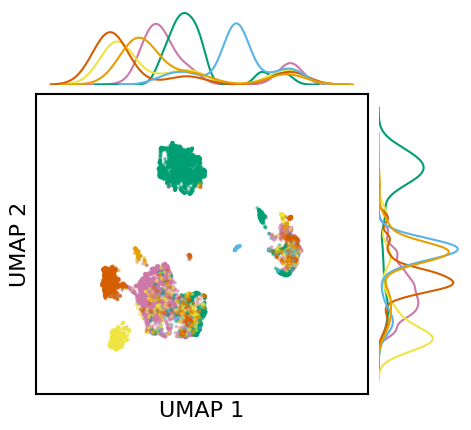

<Figure size 300x100 with 0 Axes>

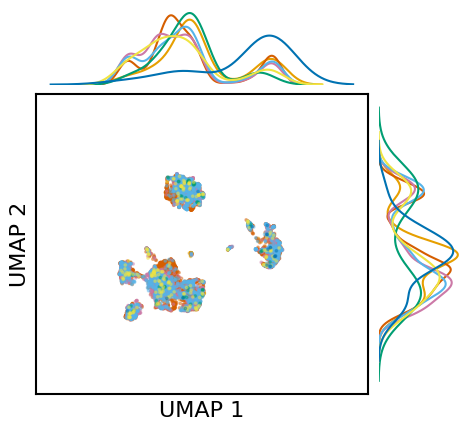

<Figure size 300x100 with 0 Axes>

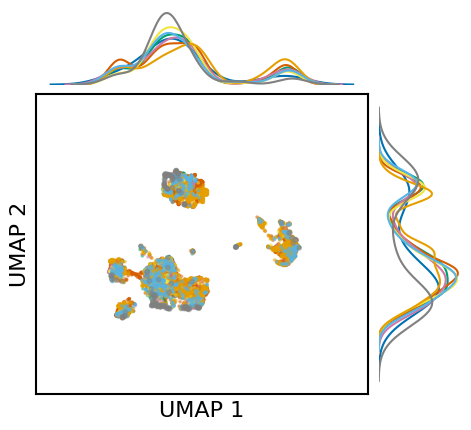

<Figure size 300x100 with 0 Axes>

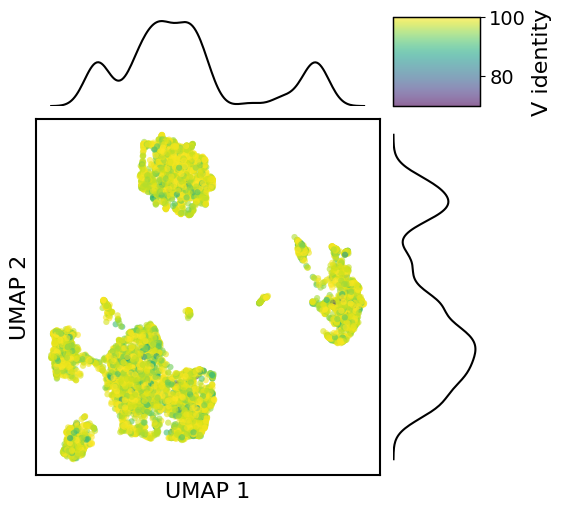

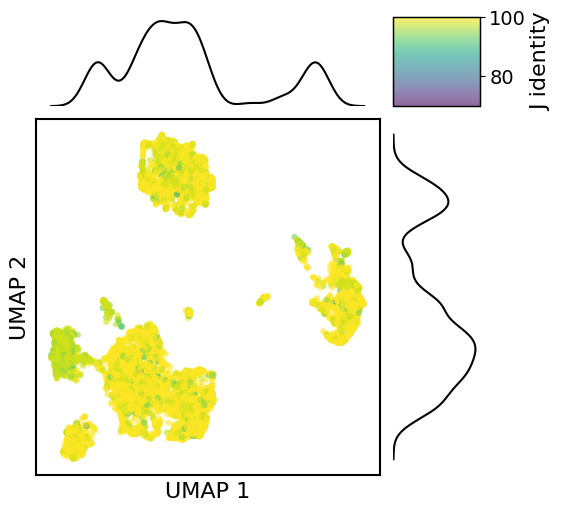

In [4]:
df = pd.read_csv("./out_healthy/PCA_H3BERTA_HEALTHY_REPERTOIRE_WITHCDRH3DUPLICATES_700011206 PCA embeddings.csv")
for col in ['v_family', 'j_family', 'd_family']:
    df[col] = df[col].astype(str).str.split('/', n=1).str[0]
    df[col] = df[col].astype(str).str.split('-', n=1).str[0]
    
gene_col = 'v_identity'
min_val = df[gene_col].min()
max_val = df[gene_col].max()
print(f"Min di {gene_col}: {min_val:.3f}")
print(f"Max di {gene_col}: {max_val:.3f}")

gene_col = 'j_identity'
min_val = df[gene_col].min()
max_val = df[gene_col].max()
print(f"Min di {gene_col}: {min_val:.3f}")
print(f"Max di {gene_col}: {max_val:.3f}")

plot_umap_single_gene_INSCAPE(df, gene_col= 'j_family', title= 'J Gene', file_suffix="./img/PAPER_HEALTHY_700011206")
plot_umap_single_gene_INSCAPE(df, gene_col= 'v_family', title= 'V Gene', file_suffix="./img/PAPER_HEALTHY_700011206")
plot_umap_single_gene_INSCAPE(df, gene_col= 'd_family', title= 'D Gene', file_suffix="./img/PAPER_HEALTHY_700011206")
plot_umap_single_gene_numeric_INSCAPE(df, gene_col= 'v_identity', title= 'V identity', file_suffix="./img/PAPER_HEALTHY_700011206", value_range=(70, 100))
plot_umap_single_gene_numeric_INSCAPE(df, gene_col= 'j_identity', title= 'J identity', file_suffix="./img/PAPER_HEALTHY_700011206", value_range=(70, 100))

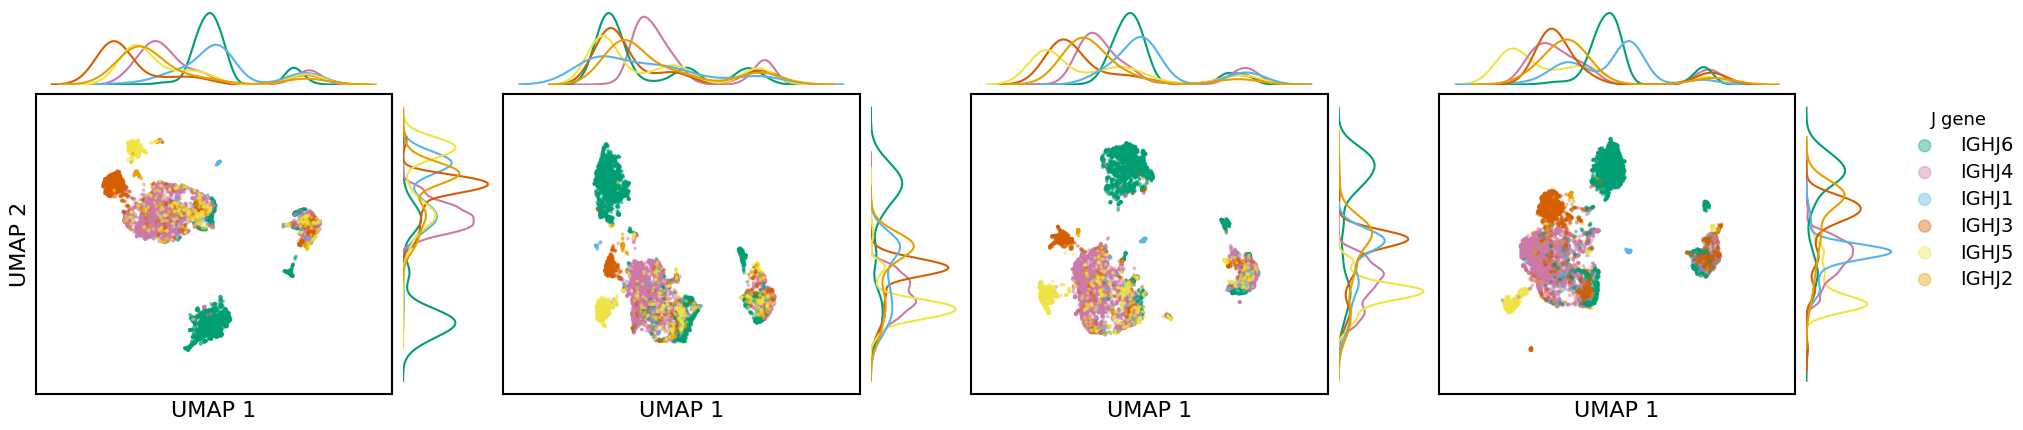

✓  Salvato UMAP multiplo con legenda in: ./img/SI_4UMAP_HEALTHY_j_family.png


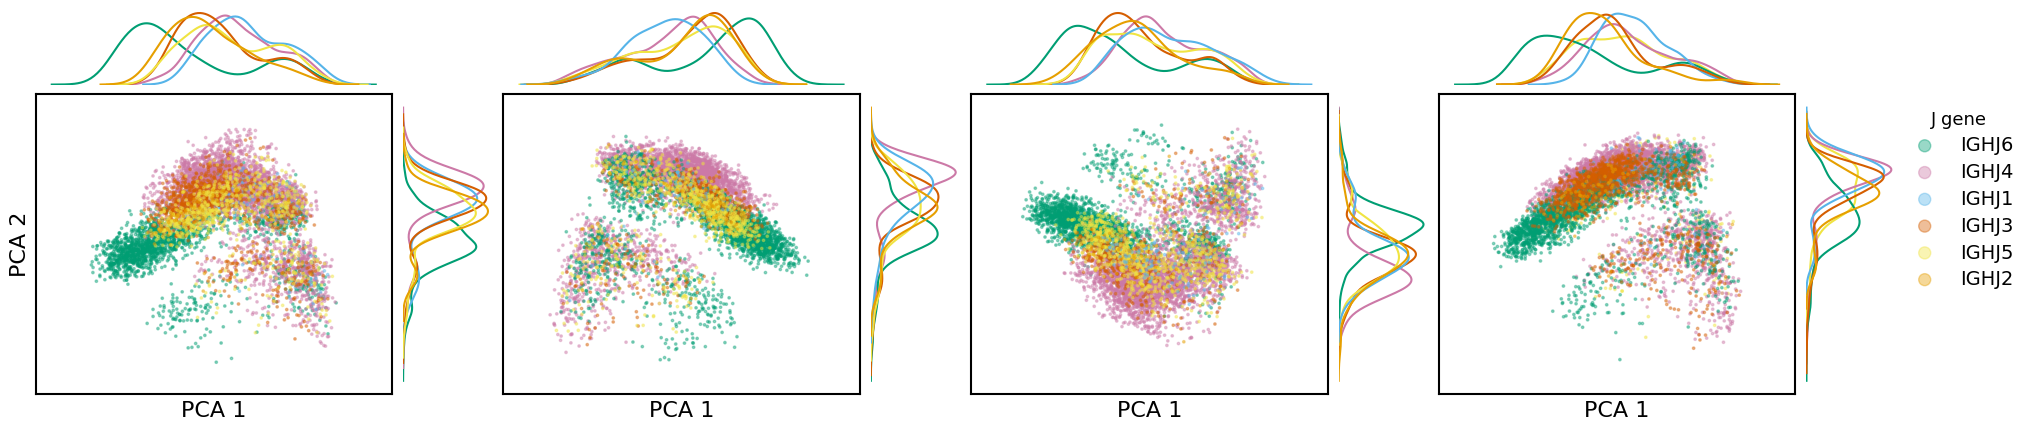

✓  Salvato PCA multiplo con legenda in: ./img/SI_4PCA_HEALTHY_j_family.png


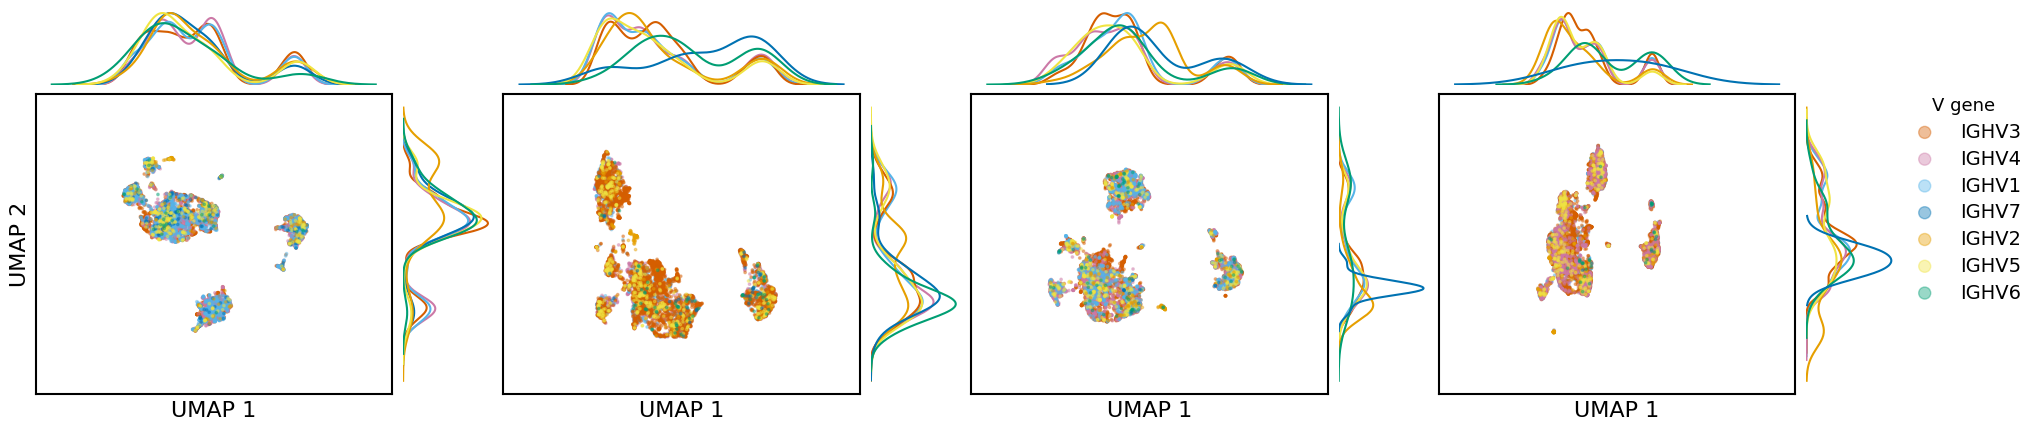

✓  Salvato UMAP multiplo con legenda in: ./img/SI_4UMAP_HEALTHY_v_family.png


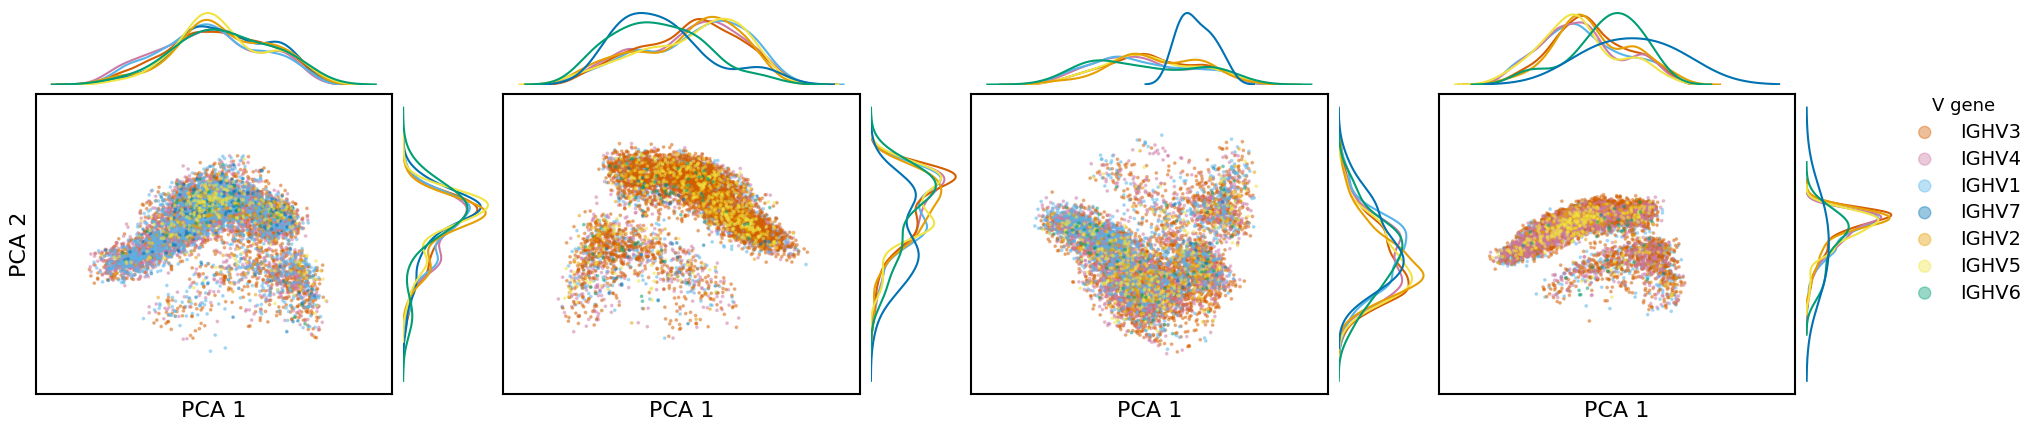

✓  Salvato PCA multiplo con legenda in: ./img/SI_4PCA_HEALTHY_v_family.png


In [5]:
import pathlib
import random
import pandas as pd

# --- parametri --------------------------------------------------------
DATA_DIR   = pathlib.Path("./out_healthy")       # cartella dove hai i CSV
N_SAMPLES   = 4                                # quanti file scegliere
SEED        = 42                               # facoltativo: per riproducibilità
# ----------------------------------------------------------------------

# 1) Trova tutti i CSV nella cartella
csv_files = list(DATA_DIR.glob("PCA*"))
if len(csv_files) < N_SAMPLES:
    raise RuntimeError(
        f"Nella cartella {DATA_DIR} ci sono solo {len(csv_files)} CSV, "
        f"ma ne servono almeno {N_SAMPLES}"
    )
# 2) Scegli (pseudo-)random i 4 file
random.seed(SEED)
selected_files = random.sample(csv_files, N_SAMPLES)
###########################################################################################################
# 3) Leggili e pulisci i campi family
dfs = []
for path in selected_files:
    df = pd.read_csv(path)

    # normalizzazione dei campi V/J/D-family
    for col in ["v_family", "j_family", "d_family"]:
        if col in df.columns:
            df[col] = (
                df[col]
                .astype(str)
                .str.split("/", n=1)
                .str[0]
                .str.split("-", n=1)
                .str[0]
            )

    dfs.append(df)
##################################################################################################    
GENE_COL='j_family'
FILE_SUFFIX = F"./img/SI_4UMAP_HEALTHY_{GENE_COL}"  
# 4) Plot
plot_umap_four_datasets(
    dfs,
    gene_col=GENE_COL,
    file_suffix=FILE_SUFFIX,     # produrrà *_NO_LEGEND.svg e *_LEGEND.svg
)
FILE_SUFFIX =F"./img/SI_4PCA_HEALTHY_{GENE_COL}" 
# 4) Plot
plot_pca_four_datasets(
    dfs,
    gene_col=GENE_COL,
    file_suffix=FILE_SUFFIX,     # produrrà *_NO_LEGEND.svg e *_LEGEND.svg
)
##################################################################################################    
GENE_COL='v_family'
FILE_SUFFIX = F"./img/SI_4UMAP_HEALTHY_{GENE_COL}"  
# 4) Plot
plot_umap_four_datasets(
    dfs,
    gene_col=GENE_COL,
    file_suffix=FILE_SUFFIX,     # produrrà *_NO_LEGEND.svg e *_LEGEND.svg
)
FILE_SUFFIX = F"./img/SI_4PCA_HEALTHY_{GENE_COL}" 
# 4) Plot
plot_pca_four_datasets(
    dfs,
    gene_col=GENE_COL,
    file_suffix=FILE_SUFFIX,     # produrrà *_NO_LEGEND.svg e *_LEGEND.svg
)



# 

# bnabs: ./out_bnabs/PCA_H3BERTA_BNABS_REPERTOIRE_WITHCDRH3DUPLICATES_702010293 PCA embeddings.csv

Min di v_identity: 65.116
Max di v_identity: 100.000
Min di j_identity: 76.190
Max di j_identity: 100.000


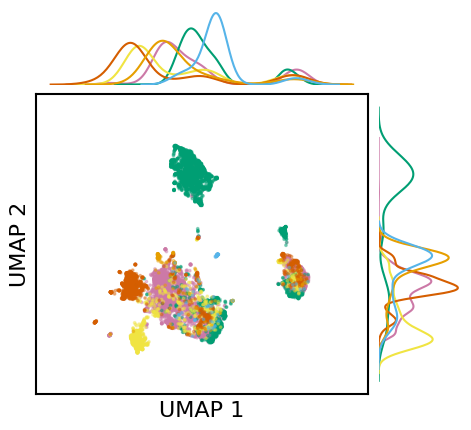

<Figure size 300x100 with 0 Axes>

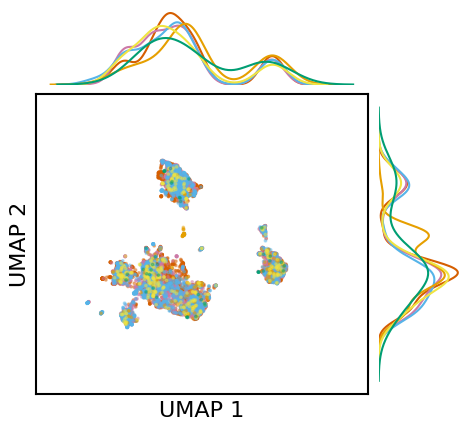

<Figure size 300x100 with 0 Axes>

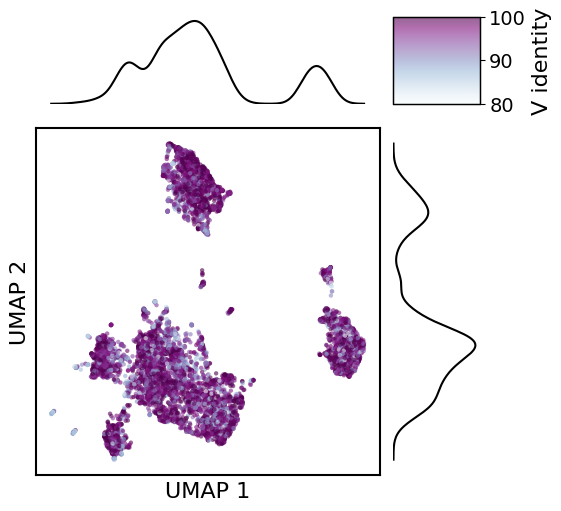

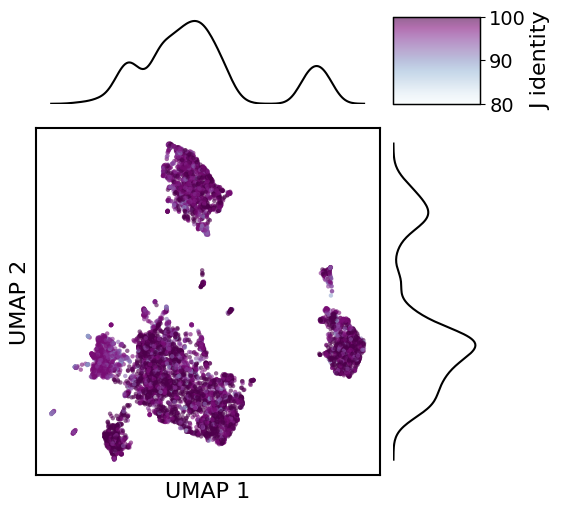

In [7]:
df = pd.read_csv("./out_bnabs/PCA_H3BERTA_BNABS_REPERTOIRE_WITHCDRH3DUPLICATES_702010293 PCA embeddings.csv")
for col in ['v_family', 'j_family', 'd_family']:
    df[col] = df[col].astype(str).str.split('/', n=1).str[0]
    df[col] = df[col].astype(str).str.split('-', n=1).str[0]

gene_col = 'v_identity'
min_val = df[gene_col].min()
max_val = df[gene_col].max()
print(f"Min di {gene_col}: {min_val:.3f}")
print(f"Max di {gene_col}: {max_val:.3f}")

gene_col = 'j_identity'
min_val = df[gene_col].min()
max_val = df[gene_col].max()
print(f"Min di {gene_col}: {min_val:.3f}")
print(f"Max di {gene_col}: {max_val:.3f}")

plot_umap_single_gene_INSCAPE(df, gene_col= 'j_family', title= 'D Gene', file_suffix="./img/PAPER_BNABS_702010293")
plot_umap_single_gene_INSCAPE(df, gene_col= 'v_family', title= 'D Gene', file_suffix="./img/PAPER_BNABS_702010293")
plot_umap_single_gene_numeric_INSCAPE(df, gene_col= 'v_identity', title= 'V identity', file_suffix="./img/PAPER_BNABS_702010293", value_range=(80, 100))
plot_umap_single_gene_numeric_INSCAPE(df, gene_col= 'j_identity', title= 'J identity', file_suffix="./img/PAPER_BNABS_702010293", value_range=(80, 100))


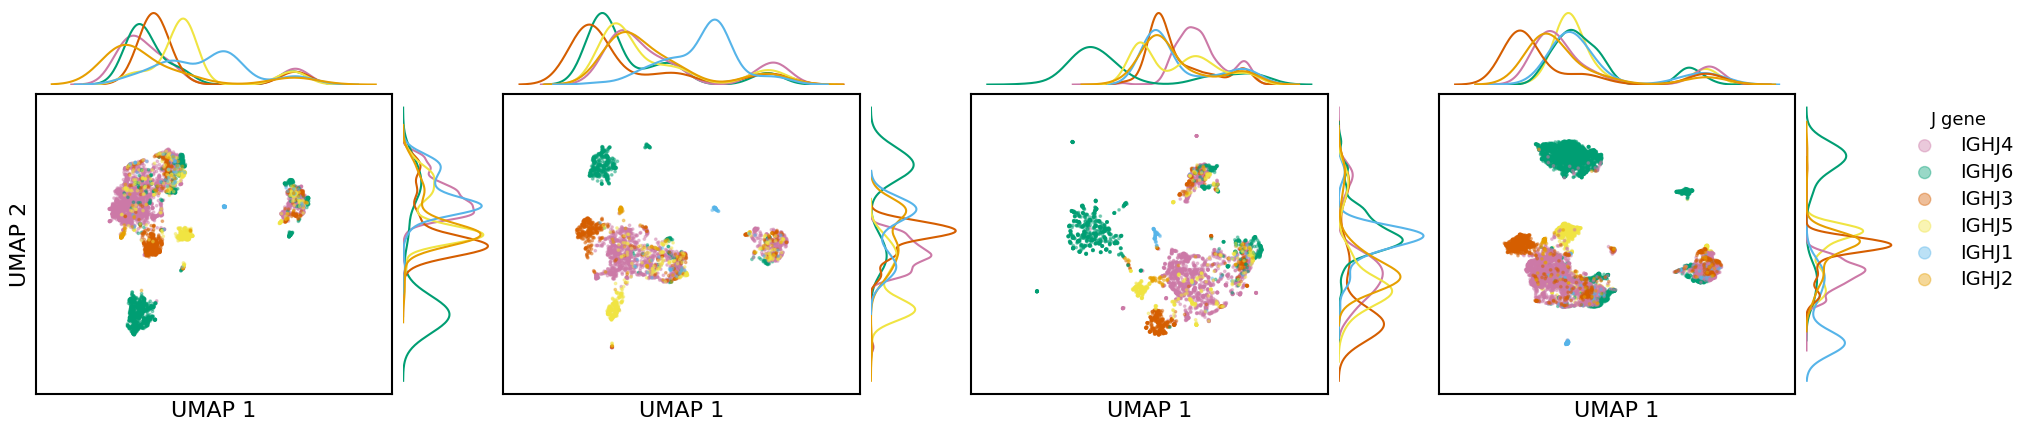

✓  Salvato UMAP multiplo con legenda in: ./img/SI_4UMAP_BNABS_j_family.png


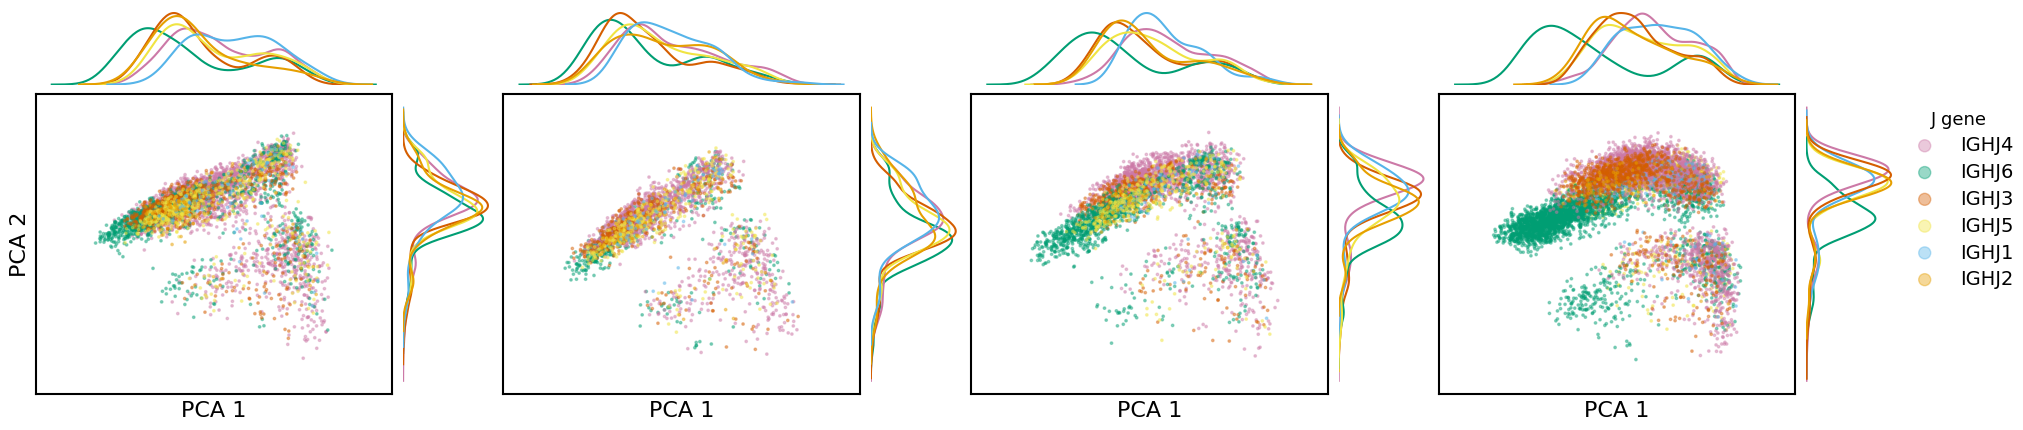

✓  Salvato PCA multiplo con legenda in: ./img/SI_4PCA_BNABS_j_family.png


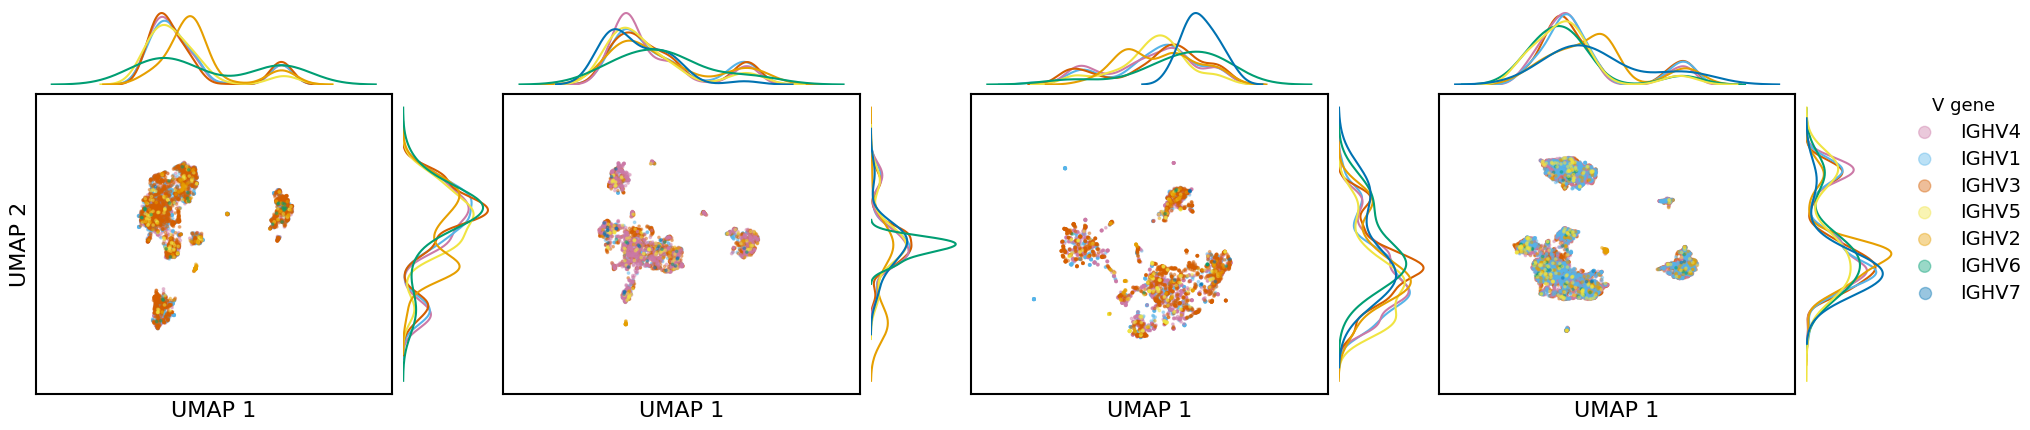

✓  Salvato UMAP multiplo con legenda in: ./img/SI_4UMAP_BNABS_v_family.png


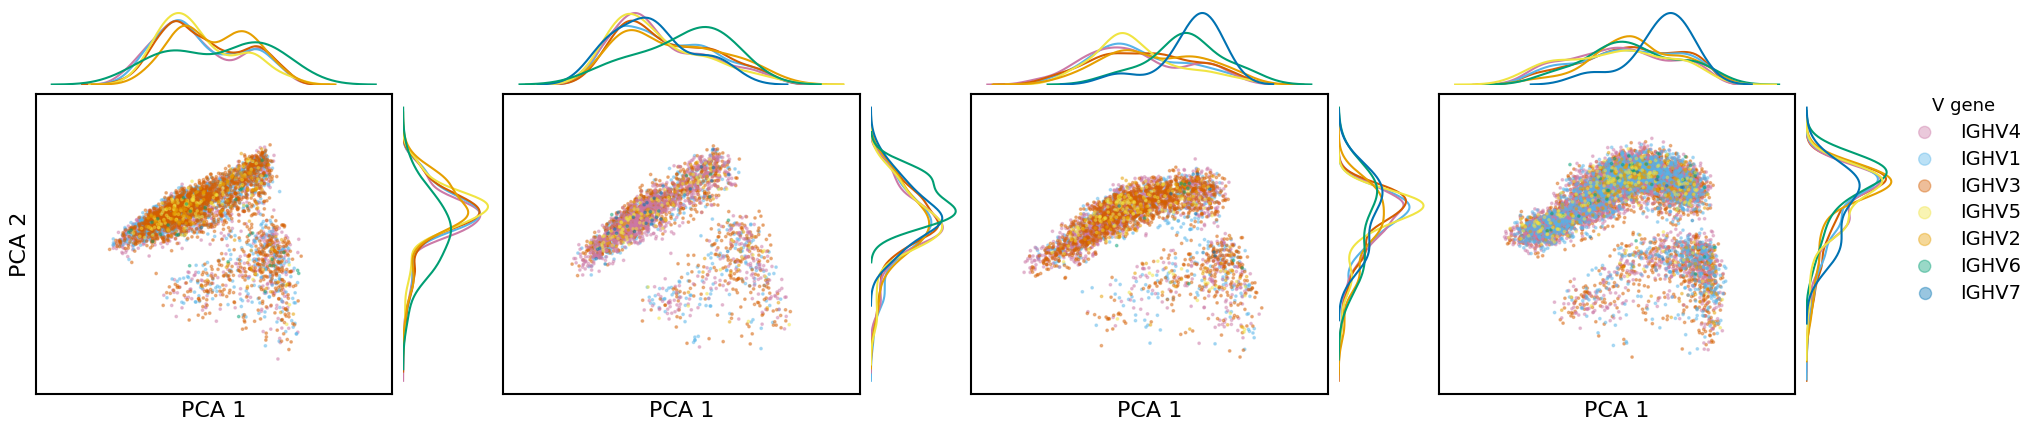

✓  Salvato PCA multiplo con legenda in: ./img/SI_4PCA_BNABS_v_family.png


In [7]:
import pathlib
import random
import pandas as pd

# --- parametri --------------------------------------------------------
DATA_DIR   = pathlib.Path("./out_bnabs")       # cartella dove hai i CSV
N_SAMPLES   = 4                                # quanti file scegliere
SEED        = 42                               # facoltativo: per riproducibilità
# ----------------------------------------------------------------------

# 1) Trova tutti i CSV nella cartella
csv_files = list(DATA_DIR.glob("PCA*"))
if len(csv_files) < N_SAMPLES:
    raise RuntimeError(
        f"Nella cartella {DATA_DIR} ci sono solo {len(csv_files)} CSV, "
        f"ma ne servono almeno {N_SAMPLES}"
    )
# 2) Scegli (pseudo-)random i 4 file
random.seed(SEED)
selected_files = random.sample(csv_files, N_SAMPLES)
###########################################################################################################
# 3) Leggili e pulisci i campi family
dfs = []
for path in selected_files:
    df = pd.read_csv(path)

    # normalizzazione dei campi V/J/D-family
    for col in ["v_family", "j_family", "d_family"]:
        if col in df.columns:
            df[col] = (
                df[col]
                .astype(str)
                .str.split("/", n=1)
                .str[0]
                .str.split("-", n=1)
                .str[0]
            )

    dfs.append(df)
##################################################################################################    
GENE_COL='j_family'
FILE_SUFFIX = F"./img/SI_4UMAP_BNABS_{GENE_COL}"  
# 4) Plot
plot_umap_four_datasets(
    dfs,
    gene_col=GENE_COL,
    file_suffix=FILE_SUFFIX,     # produrrà *_NO_LEGEND.svg e *_LEGEND.svg
)
FILE_SUFFIX =F"./img/SI_4PCA_BNABS_{GENE_COL}" 
# 4) Plot
plot_pca_four_datasets(
    dfs,
    gene_col=GENE_COL,
    file_suffix=FILE_SUFFIX,     # produrrà *_NO_LEGEND.svg e *_LEGEND.svg
)
##################################################################################################    
GENE_COL='v_family'
FILE_SUFFIX = F"./img/SI_4UMAP_BNABS_{GENE_COL}"  
# 4) Plot
plot_umap_four_datasets(
    dfs,
    gene_col=GENE_COL,
    file_suffix=FILE_SUFFIX,     # produrrà *_NO_LEGEND.svg e *_LEGEND.svg
)
FILE_SUFFIX = F"./img/SI_4PCA_BNABS_{GENE_COL}" 
# 4) Plot
plot_pca_four_datasets(
    dfs,
    gene_col=GENE_COL,
    file_suffix=FILE_SUFFIX,     # produrrà *_NO_LEGEND.svg e *_LEGEND.svg
)



# therapeutical antibodies

FROM https://academic.oup.com/bioinformatics/article/37/22/4041/6295884?login=true#405570562

2.7 Anti-drug antibody response levels of therapeutics

Anti-drug antibody (ADA) responses of patients were obtained for 217 therapeutics from clinical papers using an identical approach to that described in Clavero-Alvarez et al. (2018). When multiple ADA levels are reported for the same therapeutic, the mean between the minimal and maximal reported value is used. We then obtained the sequences of 10 additional therapeutics, for which we had ADA response data but which were not included in Thera-SAbDab, from Clavero-Alvarez et al. (2018). The complete list of therapeutics together with observed immunogenicity levels can be found in the Supplementary Material.

In [16]:
import pandas as pd

# 1) Read the Excel file, skip the first 3 rows, and use the 4th row as the header
df = pd.read_excel("./Thera-SAbDab_btab434_supplementary_data/Therapeutic_Sequences.xlsx", skiprows=3)
df.columns = df.columns.map(str)
# 2) Verify that the “Name” column exists
assert "Name" in df.columns, "Column 'Name' not found in the sheet"

# 3) Define the list of CDRH3 segment columns in the desired order
cols_to_join = [
    "105","106","107","108","109","110",
    "111","111A","111B","111C","111D","111E","111F",
    "112G","112F","112E","112D","112C","112B","112A",
    "112","113","114","115","116","117"
]

# 4) Build a new column “cdrh3” by concatenating the segment columns for each row:
#    - Fill NaN with empty string to avoid literal "nan"
#    - Cast all values to string
#    - Join them together in the specified order
df["sequence"] = (
    df[cols_to_join]
      .fillna("")              # replace missing values with ""
      .astype(str)             # convert all entries to string
      .agg("".join, axis=1)    # concatenate horizontally per row
      .replace("-","")
)
# Remove all hyphens from the 'cdrh3' column
df["sequence"] = df["sequence"].str.replace("-", "", regex=False)

mapping = {
    "u":    "Human",
    "zu":   "Humanized",
    "xizu": "Chimeric/Humanized",
    "xi":   "Chimeric",
    "o":    "Mouse"
}

df["Origin"] = df["Origin"].replace(mapping)

df = df[df['Origin']!='Chimeric/Humanized']
# 5) Extract only the “Name” and newly created “cdrh3” columns
sequences = df[["Name", "sequence",'Origin']]

###################################################################################################################
# 1) Read the Excel file, skip the first 3 rows, and use the 4th row as the header
df = pd.read_excel("./Thera-SAbDab_btab434_supplementary_data/Therapeutic_ADA.xlsx", skiprows=2)
df.columns = df.columns.map(str)

# 2) Verif that the “Name” column exists
assert "Name" in df.columns, "Column 'Name' not found in the sheet"

# 3) Define the list of CDRH3 segment columns in the desired order
cols_to_join = [
    "Name","Immunogenicity"
]

# 5) Extract only the “Name” and newly created “cdrh3” columns
ada = df[cols_to_join]

# 6) Preview or save the result
#print(ada.head())
#print(len(ada))

# --- Approach 2: pandas.Series.map (adds it in-place)
sequences = sequences.merge(
    ada[["Name", "Immunogenicity"]],  # only keep Name + the column you need
    on="Name",
    how="left"               # use 'left' so all df1 rows stay, missing matches become NaN
)
# crea una Serie contenente solo i valori non-NaN di 'my_col'
sequences = sequences.dropna(subset=['Immunogenicity'])

sequences.to_csv("Thera-SAbDab-ADA.csv",header=True,index=False)
sequences

Name            sequence     Origin  Immunogenicity
0      Adalimumab      AKVSYLSTASSLDY      Human       14.000000
1      Afutuzumab        ARNVFDGYWLVY  Humanized        6.642066
2     Alemtuzumab        AREGHTAAPFDY  Humanized        5.100000
3      Alirocumab         AKDSNWGNFDL      Human        3.900000
4    Atezolizumab         ARRHWPGGFDY  Humanized       28.850000
..            ...                 ...        ...             ...
348    Utomilumab           ARGYGIFDY      Human       40.735000
351    Varlilumab        ARGSGNWGFFDY      Human        0.000000
352    Veltuzumab      ARSTYYGGDWYFDV  Humanized       19.500000
356    Xentuzumab          ARNMYTHFDS  Humanized        2.300000
359   Zalutumumab  ARDGITMVRGVMKDYFDY      Human        0.000000

[199 rows x 4 columns]

In [17]:
import pandas as pd
df = sequences.copy()
# Supponiamo che il tuo DataFrame si chiami df
# 1) Quante sequenze duplicate ci sono?
n_dup = df['sequence'].duplicated().sum()
print(f"Numero di righe che ripetono sequence: {n_dup}")

# 2) Quante sequenze uniche vs totali?
tot = len(df)
unique = df['sequence'].nunique()
print(f"Totale righe: {tot}, sequenze uniche: {unique}")

# 3) Visualizza tutte le righe che hanno sequence duplicata
df_dup = df[df['sequence'].duplicated(keep=False)]
print(df_dup)

# 4) Se vuoi solo i valori di sequence che compaiono più di una volta:
counts = df['sequence'].value_counts()
duplicated_seqs = counts[counts > 1].index.tolist()
print("Sequenze ripetute (>1 occorrenza):", duplicated_seqs)

# 5) Per vedere quante volte ciascuna di queste compare:
print(counts[counts > 1])


Numero di righe che ripetono sequence: 8
Totale righe: 199, sequenze uniche: 191
              Name            sequence     Origin  Immunogenicity
1       Afutuzumab        ARNVFDGYWLVY  Humanized        6.642066
21       Cetuximab       ARALTYYDYEFAY   Chimeric        5.000000
30      Eculizumab     ARYFFGSSPNWYFDV  Humanized        2.000000
62    Obinutuzumab        ARNVFDGYWLVY  Humanized        6.000000
75     Ravulizumab     ARYFFGSSPNWYFDV  Humanized        0.200000
110     Crenezumab               ASGDY  Humanized        0.000000
138     Obexelimab      ARGTYYYGTRVFDY   Chimeric       17.500000
154    Solanezumab               ASGDY  Humanized        3.500000
158    Tafasitamab      ARGTYYYGTRVFDY  Humanized        1.000000
164    Ticilimumab  ARDPRGATLYYYYYGMDV      Human        2.000000
167   Tremelimumab  ARDPRGATLYYYYYGMDV      Human        0.000000
204     Coltuximab       ARGSNPYYYAMDY   Chimeric       33.000000
243  Gatipotuzumab            TRHYYFDY  Humanized        9.45

2025-07-10 20:38:06.089602: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752172686.106454 1221102 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752172686.111678 1221102 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752172686.125304 1221102 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752172686.125317 1221102 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752172686.125319 1221102 computation_placer.cc:177] computation placer alr

Running model: H3BERTA_ADA
La cartella 'img' esiste già.


Some weights of RobertaModel were not initialized from the model checkpoint at /ibmm_data/rodelc/DALM/LM/HEAVY/CDRH3/HEALTHY/P3-pipelines/model/SUB-PIPELINE1:IgG_IgA_Bsources/config3.json_lr5e-5_bs1024/BEST_MODEL/epoch_113/hf and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Computing embeddings...


100%|██████████| 183/183 [00:04<00:00, 37.65it/s]


Embeddings saved to ./H3BERTA_ADA_embeddings.pkl
Computing UMAP coordinates...


/home/rodelc/anaconda3/envs/aa_ss_tokenizer_2.0/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP coordinates saved to ./out_ada//UMAP_H3BERTA_ADA PCA embeddings.csv
IMG saved to img/UMAP_H3BERTA_ADA PCA embeddings.png


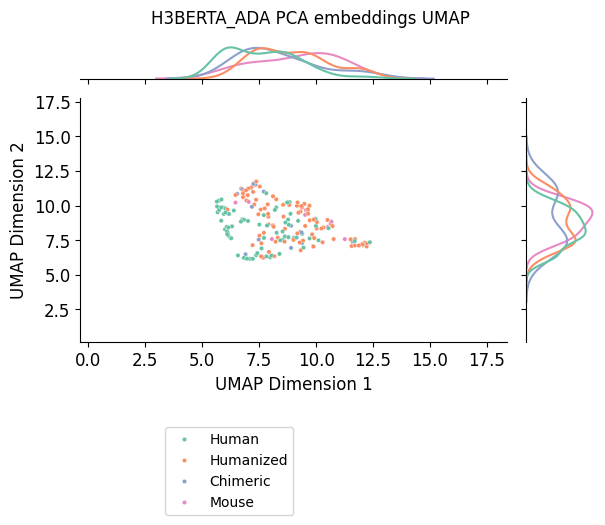

Computing PCA coordinates...
PCA coordinates saved to ./out_ada//PCA_H3BERTA_ADA PCA embeddings.csv


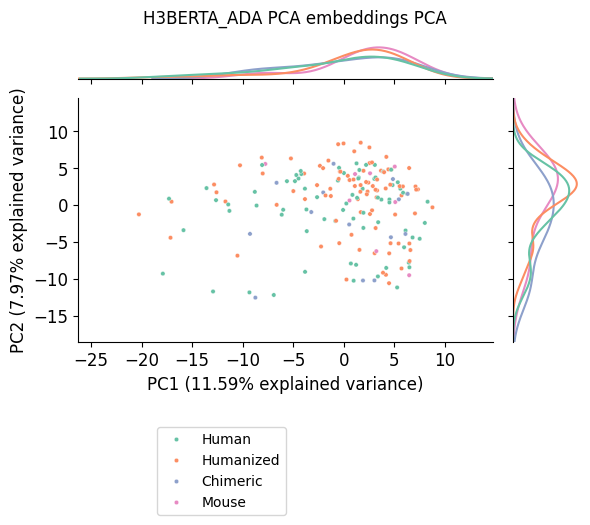

IMG saved to img/PCA_H3BERTA_ADA PCA embeddings.png


In [4]:
import os
from evaluate_mlm import main
import pandas as pd

MODEL_PATH = "/ibmm_data/rodelc/DALM/LM/HEAVY/CDRH3/HEALTHY/P3-pipelines/model/SUB-PIPELINE1:IgG_IgA_Bsources/config3.json_lr5e-5_bs1024/BEST_MODEL/epoch_113/hf"  

#Percorso alla cartella dei file .txt
TXT_DIR = './Thera-SAbDab-ADA.csv'

# Colonne da assegnare manualmente ai file .txt


# Output directory
REDUCTION_OUTPUT_PATH = './out_ada/'

filepath = TXT_DIR
filename ="ADA"

# Legge il file come CSV senza intestazione, ma con separatore ','
df = pd.read_csv(filepath, header=0)
df = (
df.groupby('sequence', as_index=False)                # raggruppa per sequenza
.filter(lambda g: len(g.drop_duplicates()) == 1)    # scarta i gruppi "misti"
.drop_duplicates(subset='sequence')                 # rimuove l'unico duplicato rimasto
)


# Ora puoi passare il dataframe direttamente, oppure salvarlo in memoria come CSV-like string
# oppure modificare la funzione `main()` per accettare anche DataFrame in input
# Qui lo salviamo temporaneamente in memoria come oggetto CSV per compatibilità
tmp_csv_path = '/tmp/tmp_data.csv'
df.to_csv(tmp_csv_path, index=False)

model_name = 'H3BERTA_' + filename.replace('.csv', '').upper()
embedding_file = f"./{model_name}_embeddings.pkl"
plot_title = model_name + ' PCA embeddings'
hue_class = 'Origin'

print(f"Running model: {model_name}")

main(model_name, MODEL_PATH, tmp_csv_path, embedding_file, plot_title, hue_class,
    REDUCTION_OUTPUT_PATH, umap=True, pca=True)

#Embeddings saved to ./H3BERTA_ADA_embeddings.pkl
#Loading UMAP coordinates from ./out_ada//UMAP_H3BERTA_ADA PCA embeddings.csv

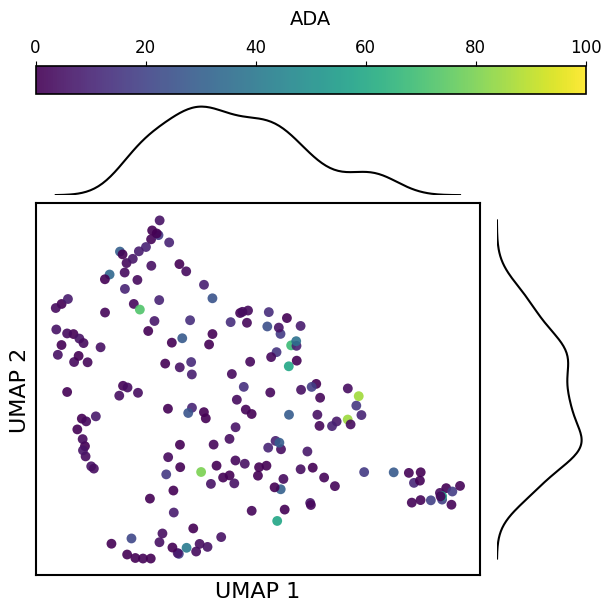

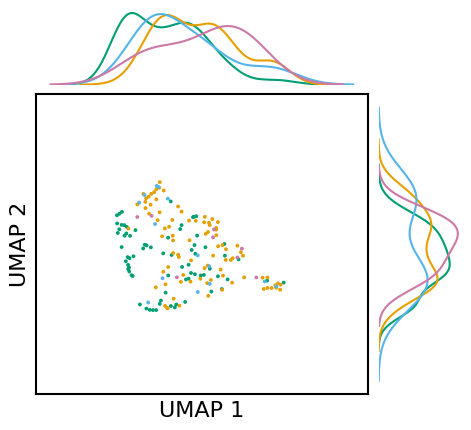

<Figure size 300x100 with 0 Axes>

In [1]:
from plots_utils import *
import pandas as pd
df = pd.read_csv("./out_ada/UMAP_H3BERTA_ADA PCA embeddings.csv")
plot_umap_single_gene_numeric_INSCAPE_cmaporizzontale(df, gene_col= 'Immunogenicity', title= 'ADA', file_suffix="./img/PAPER_ADA", value_range=(0, 100))
plot_umap_single_gene_INSCAPE_biggerpoints(df, gene_col= 'Origin', title= 'Origin', file_suffix="./img/PAPER_ADA")

# JAFFE NAIVE AND MEMORY